<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_3/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# **Read Data IMDB-Movie-Data**

In [12]:
data = pd.read_csv('/content/sample_data/IMDB-Movie-Data.csv', index_col = 'Rank', parse_dates = True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


<ipython-input-12-76d9a58fcc68>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/sample_data/IMDB-Movie-Data.csv', index_col = 'Rank', parse_dates = True)


In [13]:
data.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [14]:
data.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [15]:
data["Title"][data["Title"].str.startswith("S")]

,Title
Rank,
3,Split
4,Sing
5,Suicide Squad
41,Sausage Party
49,Star Trek Beyond
...,...
974,Scream 4
990,Selma
996,Secret in Their Eyes


In [16]:
data["Title"][data["Title"].str.startswith("S")].count()

82

In [17]:
data.iloc[100:230][["Title", "Genre", "Year"]]

,Title,Genre,Year
Rank,,,
101,Legend,"Biography,Crime,Drama",2015
102,Thor,"Action,Adventure,Fantasy",2011
103,The Martian,"Adventure,Drama,Sci-Fi",2015
104,Contratiempo,"Crime,Mystery,Thriller",2016
105,The Man from U.N.C.L.E.,"Action,Adventure,Comedy",2015
...,...,...,...
226,American Honey,Drama,2016
227,The Lobster,"Comedy,Drama,Romance",2015
228,Predators,"Action,Adventure,Sci-Fi",2010


In [18]:
data[(data["Rating"] > 8.9) & (data["Revenue (Millions)"] > data["Revenue (Millions)"].quantile(0.9999999999999999))]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,


In [19]:
data.groupby("Director")[["Rating"]].mean().sort_values(["Rating"], ascending= False)

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50
...,...
Micheal Bafaro,3.50
Jonathan Holbrook,3.20
Shawn Burkett,2.70


In [20]:
director_stats = data.groupby("Director").agg(
    Rating = ("Rating", "mean"),
    Revenue_mean = ("Revenue (Millions)", "mean"),
    Number_of_movie = ("Title", "size")
).sort_values(["Rating"], ascending = False)
print(director_stats)

                   Rating  Revenue_mean  Number_of_movie
Director                                                
Nitesh Tiwari        8.80        11.150                1
Christopher Nolan    8.68       303.018                5
Olivier Nakache      8.60        13.180                1
Makoto Shinkai       8.60         4.680                1
Aamir Khan           8.50         1.200                1
...                   ...           ...              ...
Micheal Bafaro       3.50           NaN                1
Jonathan Holbrook    3.20           NaN                1
Shawn Burkett        2.70           NaN                1
James Wong           2.70         9.350                1
Jason Friedberg      1.90        14.170                1

[644 rows x 3 columns]


<Axes: xlabel='Rank'>

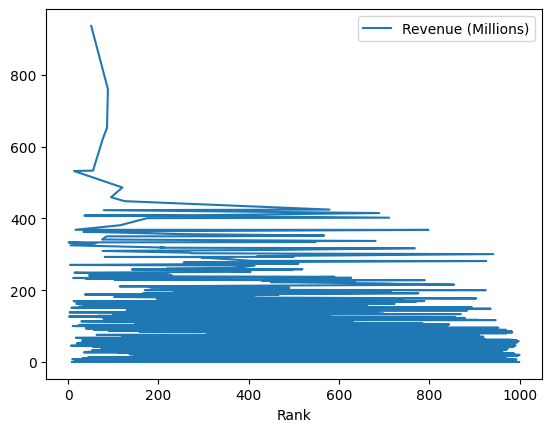

In [21]:
data[["Revenue (Millions)"]].sort_values(["Revenue (Millions)"], ascending = False).interpolate().plot()


In [23]:
def rating_score(rating):
  if rating > 7.0:
    return "Good"
  elif rating > 6.0:
    return "Average"
  else:
    return "Bad"

data["Rating"] = data["Rating"].apply(rating_score)
data[["Title", "Rating"]]

,Title,Rating
Rank,,
1,Guardians of the Galaxy,Good
2,Prometheus,Average
3,Split,Good
4,Sing,Good
5,Suicide Squad,Average
...,...,...
996,Secret in Their Eyes,Average
997,Hostel: Part II,Bad
998,Step Up 2: The Streets,Average


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Read Data Opsd-Germany**

In [31]:
df = pd.read_csv("/content/opsd_germany_daily.csv")
df.describe()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [28]:
# df = df.set_index("Date")
# print(df)

In [33]:
df["Date"] = pd.to_datetime(df["Date"], utc=False)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day

df = df.drop("Date", axis=1)

print(df)


      Consumption     Wind   Solar  Wind+Solar  Year  Month  Weekday
0      1069.18400      NaN     NaN         NaN  2006      1        1
1      1380.52100      NaN     NaN         NaN  2006      1        2
2      1442.53300      NaN     NaN         NaN  2006      1        3
3      1457.21700      NaN     NaN         NaN  2006      1        4
4      1477.13100      NaN     NaN         NaN  2006      1        5
...           ...      ...     ...         ...   ...    ...      ...
4378   1263.94091  394.507  16.530     411.037  2017     12       27
4379   1299.86398  506.424  14.162     520.586  2017     12       28
4380   1295.08753  584.277  29.854     614.131  2017     12       29
4381   1215.44897  721.247   7.467     728.714  2017     12       30
4382   1107.11488  721.176  19.980     741.156  2017     12       31

[4383 rows x 7 columns]


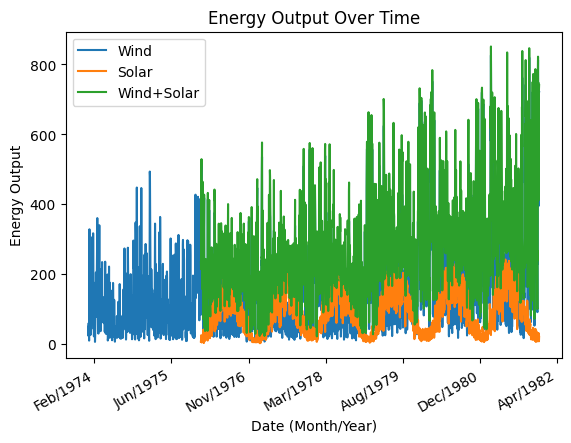

In [34]:
import matplotlib.pyplot as plt
df[["Wind", "Solar", "Wind+Solar"]].interpolate().plot()
# Format the x-axis labels to show Month/Year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b/%Y'))

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Date (Month/Year)')
plt.ylabel('Energy Output')
plt.title('Energy Output Over Time')

# Show plot
plt.show()